## Cereal Dataset Analysis and Visualization
To begin we first import out dataset using the `.read_csv()` method. We also import the tools neccessary to visualize the incoming Data.
We use the `.head()` function to get a cursory view of the imported data.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('cereal.csv')
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


After viewing the data we can see that our dataset is split into 16 columns. We are analysing our data to show the cereal's nutrition content in the following classes of food: Carbohydrate, Protein, Minerals, Fats, and Vitamins.
Proteins, fats and vitamins are already represented in our dataset, however the values for carbohydrates and minerals are not present.
Carbohydrates consists of sugars, starches and fibers so we can effectively combibe the carbo, sugars and fibers colums to give us an acurate representation of a cereal's carbohydrate content.
For Minerals The five major minerals in the human body are calcium, phosphorus, potassium, sodium, and magnesium, of these five 2 are represented in our dataset (sodium and potassium), so we can combine these colums to get a representation of a cereal's mineral content.
After calcaulating the carbohydrates and mineral content, we add them as separate columns in our dataset in order to update them.
Again we use the `.head()` method to get a cursory glimpse of our updated dataset.

In [4]:
carbohydrates = dataset['carbo'] + dataset['sugars'] + dataset['fiber']
minerals = dataset['sodium'] + dataset['potass']
dataset['carbohydrates'] = carbohydrates
dataset['minerals'] = minerals
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrates,minerals
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,21.0,410
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,18.0,150
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,21.0,580
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,22.0,470
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,23.0,199


Next we get rid of the irrelavant columns in our dataset by creating a new dataset called *Updated_dataset*, this new dataset contains only relevant columns pulled from our original dataset.
This rows include :
1. name
2. protein
3. fat
4. carbohydrates
5. minerals
6. vitamins

In [5]:
updated_dataset = dataset[['name', 'protein', 'fat', 'carbohydrates','minerals', 'vitamins']]
updated_dataset.head()

,name,protein,fat,carbohydrates,minerals,vitamins
0,100% Bran,4,1,21.0,410,25
1,100% Natural Bran,3,5,18.0,150,0
2,All-Bran,4,1,21.0,580,25
3,All-Bran with Extra Fiber,4,0,22.0,470,25
4,Almond Delight,2,2,23.0,199,25


To begin our visualization and subsequent analysis we pull the cereal's name colum alongside a food class colum into its own dataset. This gives us total of 5 datasets, each showcasing a cereal's value in a rescpective food class.

In [6]:
carb_dataset = updated_dataset[['name','carbohydrates']]
fat_dataset = updated_dataset[['name', 'fat']]
protein_dataset = updated_dataset[['name','protein']]
mineral_dataset = updated_dataset[['name','minerals']]
vitamin_dataset = updated_dataset[['name', 'vitamins']]


# Sorting Dataframes

Each of our datasets contains about 77 rows, each showcasing a specific cereal's food class content.
Since we are concerned with the the top cereals in each food class, we sort our datasets using the `.sort_values()` method.
We sort by the food class represented in each dataset.
we also set `ascending=False` so as to have the cereals with the highest values first in the dataset

In [7]:
carb_dataset = carb_dataset.sort_values(by=['carbohydrates'],ascending=False)
vitamin_dataset = vitamin_dataset.sort_values(by=['vitamins'], ascending=False)
protein_dataset = protein_dataset.sort_values(by=['protein'], ascending = False)
fat_dataset = fat_dataset.sort_values(by=['fat'], ascending=False)
mineral_dataset = mineral_dataset.sort_values(by=['minerals'], ascending=False)



# visualize datasets

### Carbohydrates
To begin visualizing our dataset we use the earlier imported seaborn module which is built on the matplotlib lib to visualize our data.
We set the figure size to a 7 by 7 plot then we create a barploy using the name of the cereal on the x-axis and the carbohydrate content on the y-axis.
We are also concerned with the cereals with the highest carboydrate content so we limit the amount of cereals that will be ploted using the `.head(10)` method. This will limit our data to the top 10 cereals in our dataset.

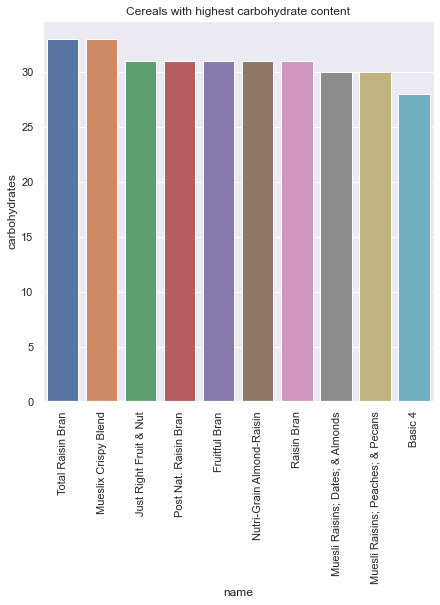

In [42]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x='name', y='carbohydrates', data=carb_dataset.head(10)).set_title("Cereals with highest carbohydrate content")
a =plt.xticks(rotation=90)
plt.show()

From our above plot we can see that *Total Raisin Bran* and *Muselix Crispy Blend* have the highest carbohydrate content.
We can perform further analysis by breaking down both brand's individual carbohydrates components.
We begin by first filtering our original dataset for the top two cereals in the carbohydrate food class, these are Total Raisin Bran and Muselix Crispy Blend. The we pull our the their respective content for each of carbohydrate individual components, these are "Carbo", "Sugars", and "Fibers"

Next we use the `.melt()` function to unpivot our DataFrame from wide format to long format.
our identifier variable will be the name of the cereal while the carbo, sugar and fibers colums will be considered values.
Finally we sort out melted data frame by its values and we use a catplot to visualize our data.

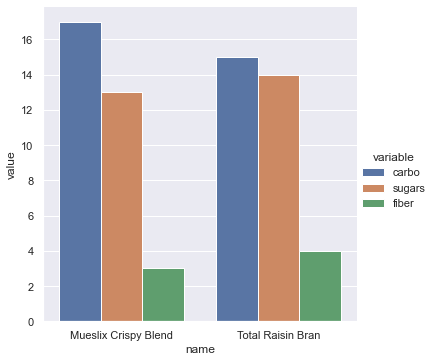

In [34]:
top_carb_cereals = dataset[(dataset['name']=='Total Raisin Bran') | (dataset['name']== 'Mueslix Crispy Blend')]
carbohydrate_breakdown_for_top_carb_cereals = top_carb_cereals[['name', 'carbo','sugars','fiber' ]]
meltdown = pd.melt(carbohydrate_breakdown_for_top_carb_cereals, id_vars = 'name')
sorted_meltdown = meltdown.sort_values(by=['value'],ascending=False)
sns.catplot(x='name', y='value', hue='variable',data=sorted_meltdown, kind='bar')
plt.show()

From the above plot we can see that while Muselix Crispy brand has the Higher Carbo Value, Total Raisin Bran has more content 
When considering Sugars and fiber.

### Protein Content
Moving on we plot our protein dataset, We set the figure size to a 7 by 7 plot . We also limit our plot to the cereals with the highest protein content using  `head(10)` method. 

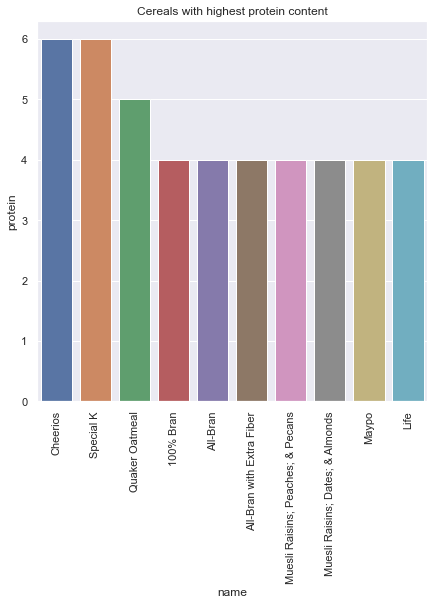

In [35]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x='name', y='protein', data=protein_dataset.head(10)).set_title("Cereals with highest protein content")
a =plt.xticks(rotation=90)

From the bar plot from above the cereals *cheerios* and *Special K* have the highest protein levels and as such are the recommended cereals for people who require a high-protein cereal.

### Fat

To determine top cereal in the Fat food class, we also employ a bar plot showing the fat content of the cereal

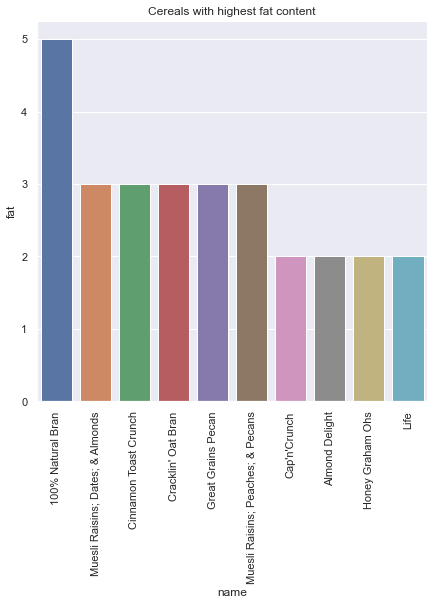

In [72]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x='name', y='fat', data=fat_dataset.head(10)).set_title("Cereals with highest fat content")
a =plt.xticks(rotation=90)

From the above it is clear that the cereal 100% Natural Bran is the top cereal within the Fat food class


### Minerals

To determine top cereal in the Mineral food class, we also employ a bar plot showing the Mineral content of the cereal

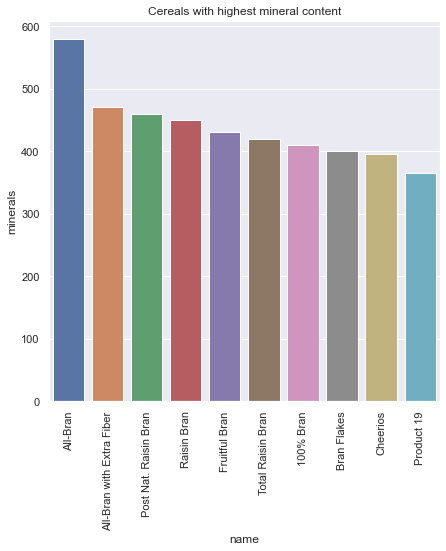

In [44]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x='name', y='minerals', data=mineral_dataset.head(10)).set_title("Cereals with highest mineral content")
a =plt.xticks(rotation=90)

From the above plot it is clear that All-Bran cereal is the cereal with the highest mineral content and as such should be the default choice for customers who desire a high Mineral content cereal.

### Vitamins
To determine the top cereal in the vitamin food class we also employed a bar plot, which highlights the top 10 cereals and their respective vitamin content.

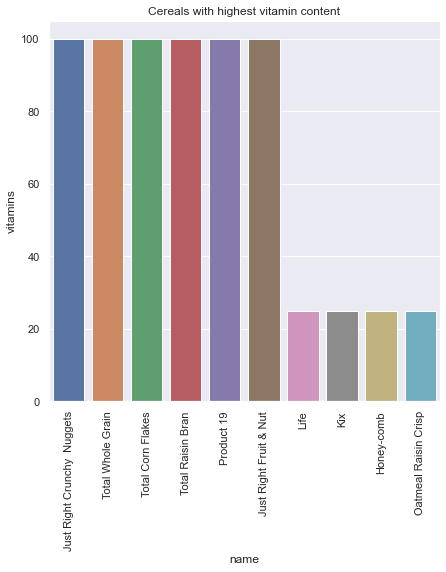

In [43]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x='name', y='vitamins', data=vitamin_dataset.head(10)).set_title("Cereals with highest vitamin content")
a =plt.xticks(rotation=90)

From the above plot, we can see that there are 6 cereal brand which possess the same amount of vitamin content, this cereal brands are the top brands when related to vitamin content.
These brands are *Just Right Crunchy Nuggets*, *Total Whole Grain*, *Total Corn Flakes*, *Product 19*, *Just Right Fruit and Nut*

# Conclusion

From the anaylsis and visualization of the data provided we can see that
1. For theCarbohydrates Food class, the top cereals are Total Raisin Bran and Muselix Crispy Blend. Further analysis show that while Total Raisin has more sugar and fiber, Muselix has more Carbo.
2. For the Protein Food class, the top cereals are Cheerios and Special K
3. For the Fat Food class, the top cereal is the 100% Natural Bran
4. For the Mineral Food class, the top cereal is the All Bran
5. For the Vitamins Food class, the top cereals are Just Right Crunchy Nuggets, Total Whole Grain, Total Corn Flakes, Product 19, Just Right Fruit and Nut